In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This is my second serious attempt to get some descent result on Kaggle Titanic Competition

In [11]:
gender_submission = pd.read_csv('C:/Users/under/Desktop/titanic_data/gender_submission.csv')
train_data = pd.read_csv('C:/Users/under/Desktop/titanic_data/train.csv')
test_data = pd.read_csv('C:/Users/under/Desktop/titanic_data/test.csv')

In [12]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
# Vocabulary to rename(it's just for my comfort)

voc = {'PassengerId':'passenger_id', 'Survived':'survived', 'Pclass':'pclass', 'Name':'name', 'Sex':'sex', 'Age':'age', \
        'SibSp':'sibsp', 'Parch':'parch', 'Ticket':'ticket', 'Fare':'fare', 'Cabin':'cabin', 'Embarked':'embarked'}

train_data = train_data.rename(columns=voc)
test_data = test_data.rename(columns=voc)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='embarked', ylabel='count'>

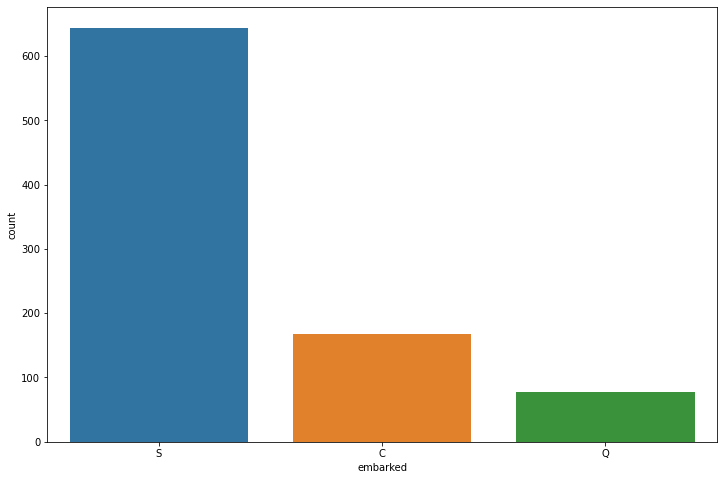

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_data, x='embarked')

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_data, x='embarked')

<AxesSubplot:xlabel='sex', ylabel='count'>

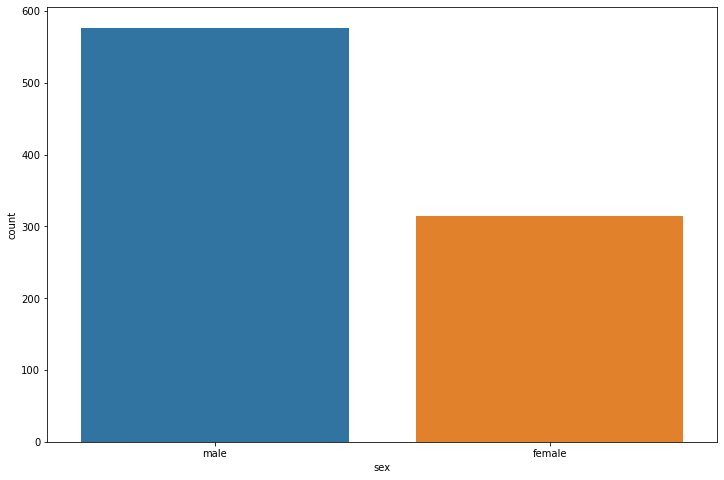

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_data, x='sex')

<AxesSubplot:xlabel='pclass', ylabel='count'>

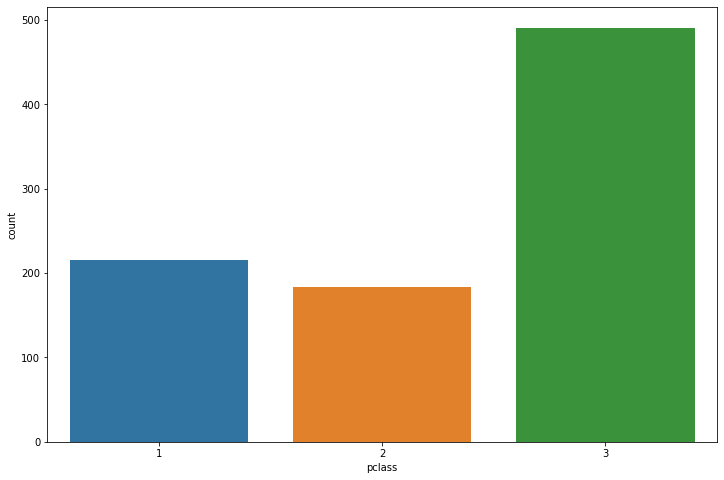

In [248]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_data, x='pclass')

<AxesSubplot:xlabel='survived', ylabel='count'>

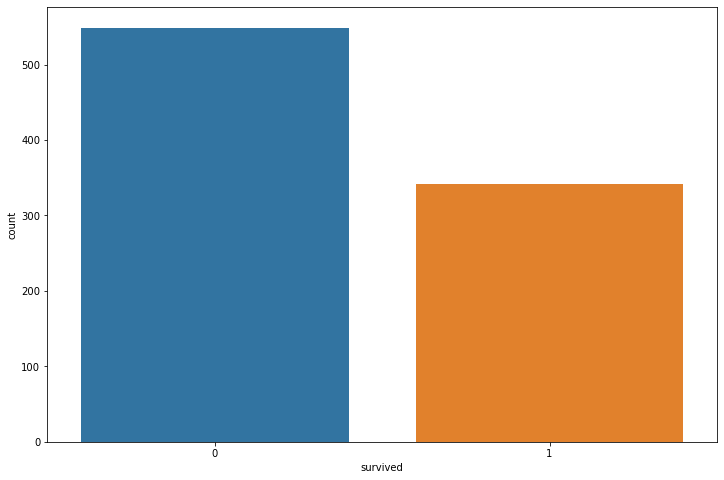

In [249]:
plt.figure(figsize=(12,8))
sns.countplot(data=train_data, x='survived')

Train data 

In [14]:
# let's drop obviously useless features: cabin (due to lots of NaNs), name, ticket and passenger_id. For start.

train_data = train_data.drop(columns=['name', 'cabin', 'passenger_id', 'ticket', 'fare'])

In [15]:
# Also we need to encode sex to 1 and 0 / and same for embarked

train_data = pd.get_dummies(train_data, columns=['sex'], dtype=int)

train_data = pd.get_dummies(train_data, columns=['embarked'], dtype=int)

train_data = pd.get_dummies(train_data, columns=['pclass'], dtype=int)

In [16]:
train_data = train_data.drop(columns=['sex_male'])

train_data = train_data.drop(columns=['embarked_S'])

train_data = train_data.drop(columns=['pclass_3'])

Test data

In [17]:
test_data = test_data.drop(columns=['name', 'cabin', 'ticket', 'fare'])

In [18]:
test_data = pd.get_dummies(test_data, columns=['sex'], dtype=int)

test_data = pd.get_dummies(test_data, columns=['embarked'], dtype=int)

test_data = pd.get_dummies(test_data, columns=['pclass'], dtype=int)

In [19]:
test_data = test_data.drop(columns=['sex_male'])

test_data = test_data.drop(columns=['embarked_S'])

test_data = test_data.drop(columns=['pclass_3'])

______________________________________there is to much to drop, should combine after all done______________________________

In [20]:
# since we have a lot NaNs in age, let's take a look into some statistics about it
print('Age mean =', train_data.age.mean())
print('Age median =', train_data.age.median())
print('Female age mean =', train_data.query('sex_female == 1').age.mean())
print('Male age mean =', train_data.query('sex_female == 0').age.mean())

Age mean = 29.69911764705882
Age median = 28.0
Female age mean = 27.915708812260537
Male age mean = 30.72664459161148


In [21]:
# in my opinion we can take general mean to fill in our missed values

train_data.age.fillna(28, inplace=True)
test_data.age.fillna(28, inplace=True)

In [22]:
# adding new feature - travel alone (for passengers with companions) to train df

train_data['travel_alone'] = np.logical_and(train_data.sibsp == 0, train_data.parch == 0)

train_data = pd.get_dummies(train_data, columns=['travel_alone'], dtype=int)

train_data = train_data.drop(columns=['travel_alone_False'])

train_data = train_data.rename(columns={'travel_alone_True': 'travel_alone'})

# and for test df

test_data['travel_alone'] = np.logical_and(test_data.sibsp == 0, test_data.parch == 0)

test_data = pd.get_dummies(test_data, columns=['travel_alone'], dtype=int)

test_data = test_data.drop(columns=['travel_alone_False'])

test_data = test_data.rename(columns={'travel_alone_True': 'travel_alone'})

<AxesSubplot:>

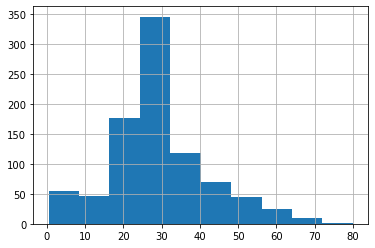

In [259]:
train_data.age.hist()

<AxesSubplot:xlabel='age', ylabel='Density'>

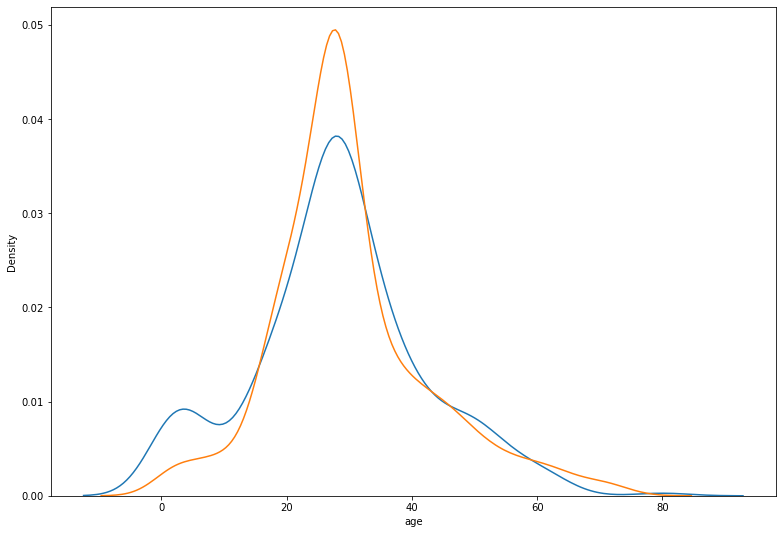

In [260]:
plt.figure(figsize=(13,9))
sns.kdeplot(train_data.age[train_data.survived == 1])
sns.kdeplot(train_data.age[train_data.survived == 0])

<AxesSubplot:xlabel='age', ylabel='survived'>

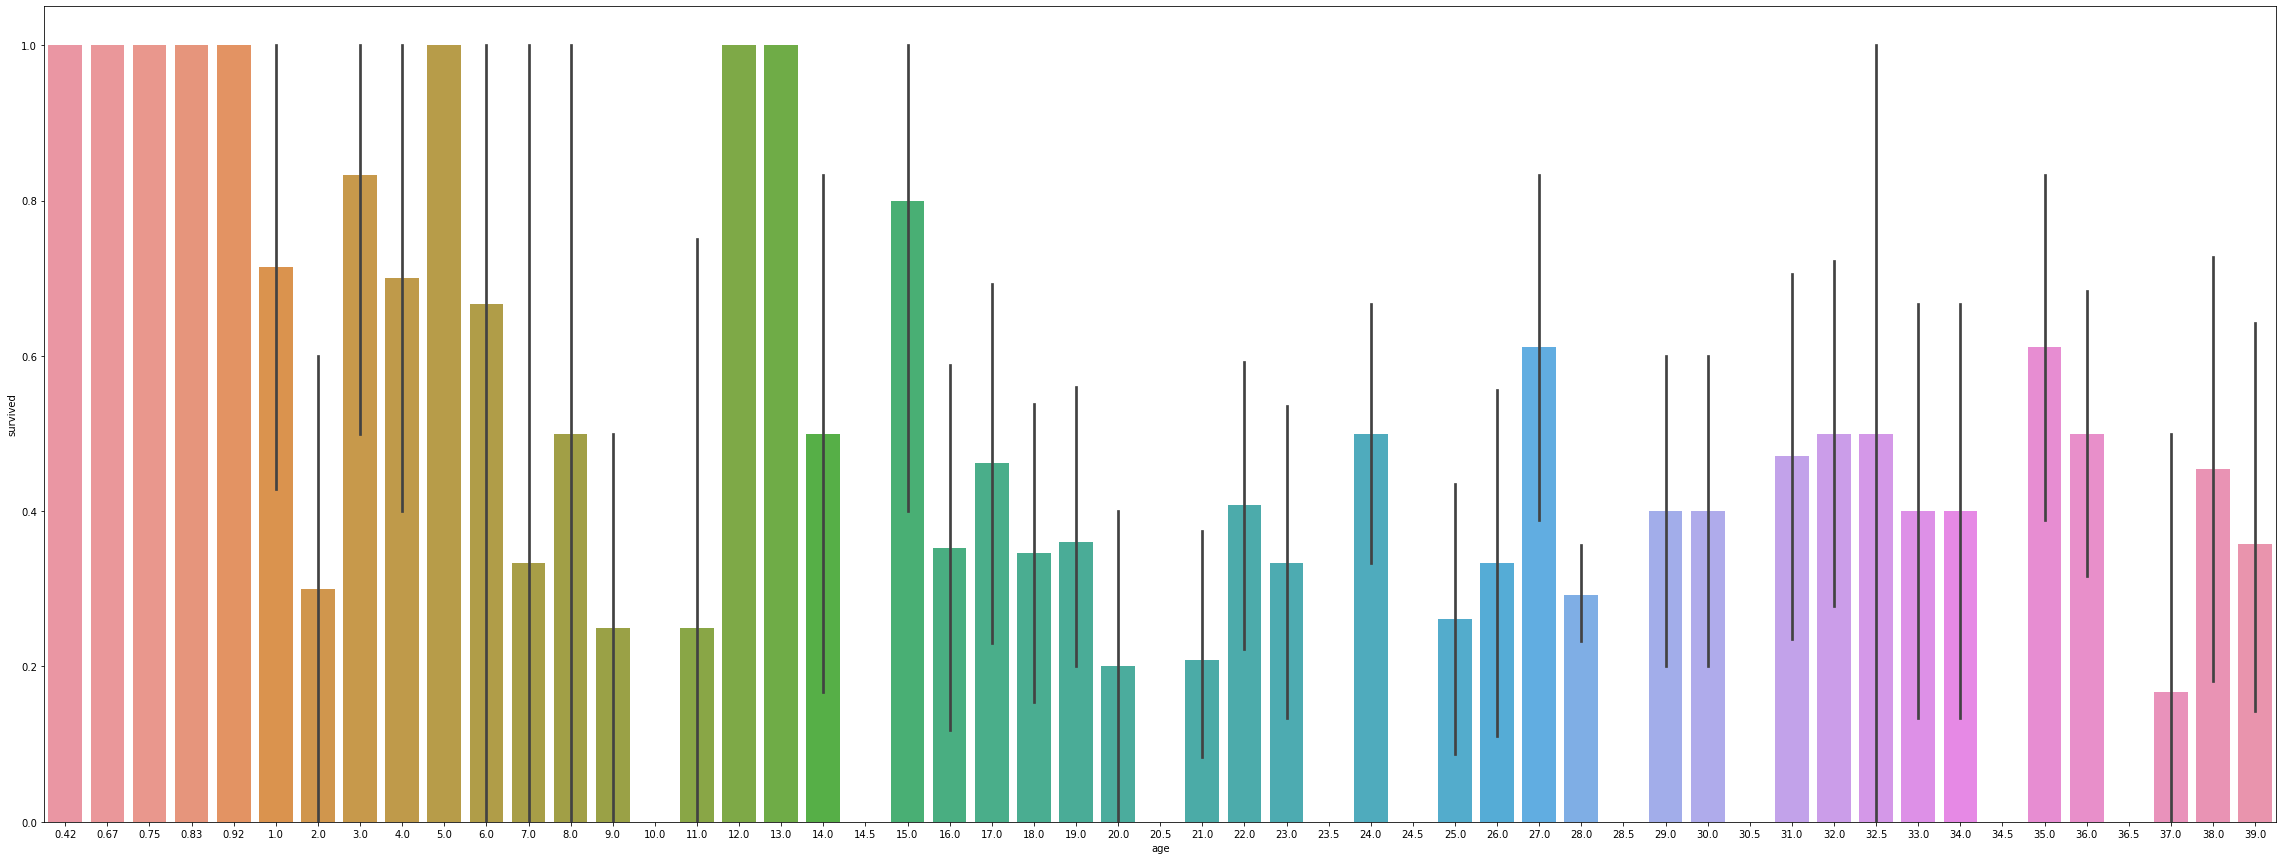

In [160]:
plt.figure(figsize=(40,15))
sns.barplot(x=train_data.age[train_data.age < 40], y=train_data.survived)

In [23]:
train_data['below_16'] = np.where(train_data.age < 16, 1, 0)
test_data['below_16'] = np.where(test_data.age < 16, 1, 0)

In [24]:
train_data.head(6)

,survived,age,sibsp,parch,sex_female,embarked_C,embarked_Q,pclass_1,pclass_2,travel_alone,below_16
0,0,22.0,1,0,0,0,0,0,0,0,0
1,1,38.0,1,0,1,1,0,1,0,0,0
2,1,26.0,0,0,1,0,0,0,0,1,0
3,1,35.0,1,0,1,0,0,1,0,0,0
4,0,35.0,0,0,0,0,0,0,0,1,0
5,0,28.0,0,0,0,0,1,0,0,1,0


In [263]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   age           891 non-null    float64
 2   sibsp         891 non-null    int64  
 3   parch         891 non-null    int64  
 4   sex_female    891 non-null    int32  
 5   embarked_C    891 non-null    int32  
 6   embarked_Q    891 non-null    int32  
 7   pclass_1      891 non-null    int32  
 8   pclass_2      891 non-null    int32  
 9   travel_alone  891 non-null    int32  
 10  below_16      891 non-null    int32  
dtypes: float64(1), int32(7), int64(3)
memory usage: 52.3 KB


In [325]:
train_data.columns

Index(['survived', 'age', 'sibsp', 'parch', 'sex_female', 'pclass_1',
       'pclass_2', 'travel_alone', 'below_16'],
      dtype='object')

In [25]:
import statsmodels.api as sm

In [30]:
X = train_data[['age', 'sibsp', 'parch', 'sex_female', 'travel_alone', 'below_16', 'pclass_1', 'pclass_2']]
y = train_data['survived']

In [266]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.435253
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.346     
Dependent Variable: survived         AIC:              791.6211  
Date:               2021-04-16 19:19 BIC:              829.9599  
No. Observations:   891              Log-Likelihood:   -387.81   
Df Model:           7                LL-Null:          -593.33   
Df Residuals:       883              LLR p-value:      1.0255e-84
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age           -0.0360    0.0071  -5.0564  0.0000  -0.0499  -0.0220
sibsp         -0.8204    0.1467  -5.5919  0.0000  -1.1079  -0.

In [ ]:
# we can remove embarked feature and try it again

In [26]:
test_data = test_data.drop(columns=['embarked_C', 'embarked_Q'])
train_data = train_data.drop(columns=['embarked_C', 'embarked_Q'])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [33]:
predictions_logreg = clf.predict(test_data.drop(columns=['passenger_id']))

In [34]:
print('Logistic Regression training accuracy score is', clf.score(X, y) * 100)

Logistic Regression training accuracy score is 81.3692480359147


In [36]:
clf.score(test_data.drop(columns=['passenger_id']), gender_submission.drop(columns=['PassengerId'])) * 100

54.78468899521531

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
rf = RandomForestClassifier(random_state=0)

In [39]:
rf.fit(X, y)

RandomForestClassifier(random_state=0)

In [40]:
params = {'n_estimators': [i for i in range(10, 101, 10)], 
          'max_depth': [i for i in range(1, 13, 2)], 
          'min_samples_leaf': [i for i in range(1, 8)], 
          'min_samples_split': [i for i in range(2, 10, 2)]}

In [286]:
rf_2 = GridSearchCV(rf, params, cv=3, n_jobs=-1)

In [287]:
rf_2.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [288]:
rf_2.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [106]:
rf_best = RandomForestClassifier(max_depth=5,
                                 min_samples_leaf=5,
                                 min_samples_split=2,
                                 n_estimators=50)

In [107]:
rf_best.fit(X, y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50)

In [108]:
rf_best.predict(test_data.drop(columns=['passenger_id']))

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
rf_best.score(test_data.drop(columns=['passenger_id']), gender_submission.drop(columns=['PassengerId'])) * 100

94.25837320574163

In [58]:
rf_test = RandomForestClassifier(max_depth=5,
                                 min_samples_leaf=5,
                                 min_samples_split=2,
                                 n_estimators=100)

In [300]:
rf_test.fit(X, y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5)

In [301]:
rf_test.predict(test_data)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
rf_test.score(test_data.drop(columns=['passenger_id']), gender_submission.drop(columns=['PassengerId'])) * 100

NameError: name 'rf_test' is not defined

In [9]:
rf_test.score(X, y) * 100

NameError: name 'rf_test' is not defined

In [51]:
rf_best2 = RandomForestClassifier(max_depth=5,
                                 min_samples_leaf=5,
                                 min_samples_split=2,
                                 n_estimators=50)

In [53]:
rf_best2.fit(X, y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50)

In [54]:
rf_best2.predict(test_data.drop(columns=['passenger_id']))

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
rf_best2.score(test_data.drop(columns=['passenger_id']), gender_submission.drop(columns=['PassengerId'])) * 100

96.41148325358851

In [297]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [305]:
from sklearn.tree import DecisionTreeClassifier

In [306]:
dt = DecisionTreeClassifier(random_state=0)

In [307]:
dt.fit(X, y)

DecisionTreeClassifier(random_state=0)

In [309]:
dt.get_depth()

18

In [311]:
dt.score(X, y)

0.9169472502805837

In [312]:
from sklearn import tree

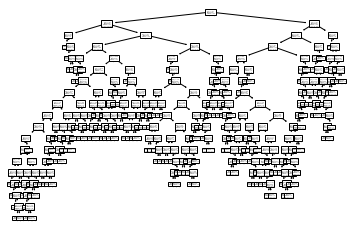

<Figure size 2160x2160 with 0 Axes>

In [315]:
tree.plot_tree(dt)
plt.figure(figsize=(30,30))
plt.show()

[Text(201.36923910189077, 211.7178947368421, 'X[3] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(97.69579175420168, 200.2736842105263, 'X[0] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(58.90651260504202, 188.82947368421054, 'X[1] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(57.03088235294118, 177.38526315789474, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(60.78214285714286, 177.38526315789474, 'X[0] <= 2.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(58.90651260504202, 165.94105263157894, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(62.6577731092437, 165.94105263157894, 'X[0] <= 3.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(60.78214285714286, 154.49684210526317, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(64.53340336134454, 154.49684210526317, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(136.48507090336133, 188.82947368421054, 'X[6] <= 0.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]'),
 

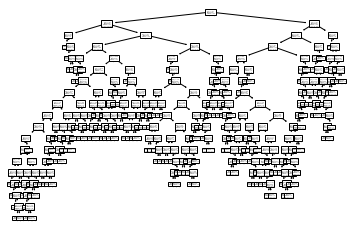

In [316]:
tree.plot_tree(dt)

In [318]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_0 <= 6.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  2.50
|   |   |   |--- feature_0 <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  2.50
|   |   |   |   |--- feature_0 <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  3.50
|   |   |   |   |   |--- class: 0
|   |--- feature_0 >  6.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_0 <= 13.00
|   |   |   |   |--- feature_1 <= 2.00
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  2.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  13.00
|   |   |   |   |--- feature_0 <= 32.25
|   |   |   |   |   |--- feature_0 <= 30.75
|   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 28.75
|   |   |   |   |   |   |   |

In [319]:
X

,age,sibsp,parch,sex_female,travel_alone,below_16,pclass_1,pclass_2
0,22.0,1,0,0,0,0,0,0
1,38.0,1,0,1,0,0,1,0
2,26.0,0,0,1,1,0,0,0
3,35.0,1,0,1,0,0,1,0
4,35.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
886,27.0,0,0,0,1,0,0,1
887,19.0,0,0,1,1,0,1,0
888,28.0,1,2,1,0,0,0,0
889,26.0,0,0,0,1,0,1,0


In [321]:
fig = plt.figure(figsize=(25,20))

<Figure size 1800x1440 with 0 Axes>

In [322]:
fig.savefig("decistion_tree.png")

KeyError: 3

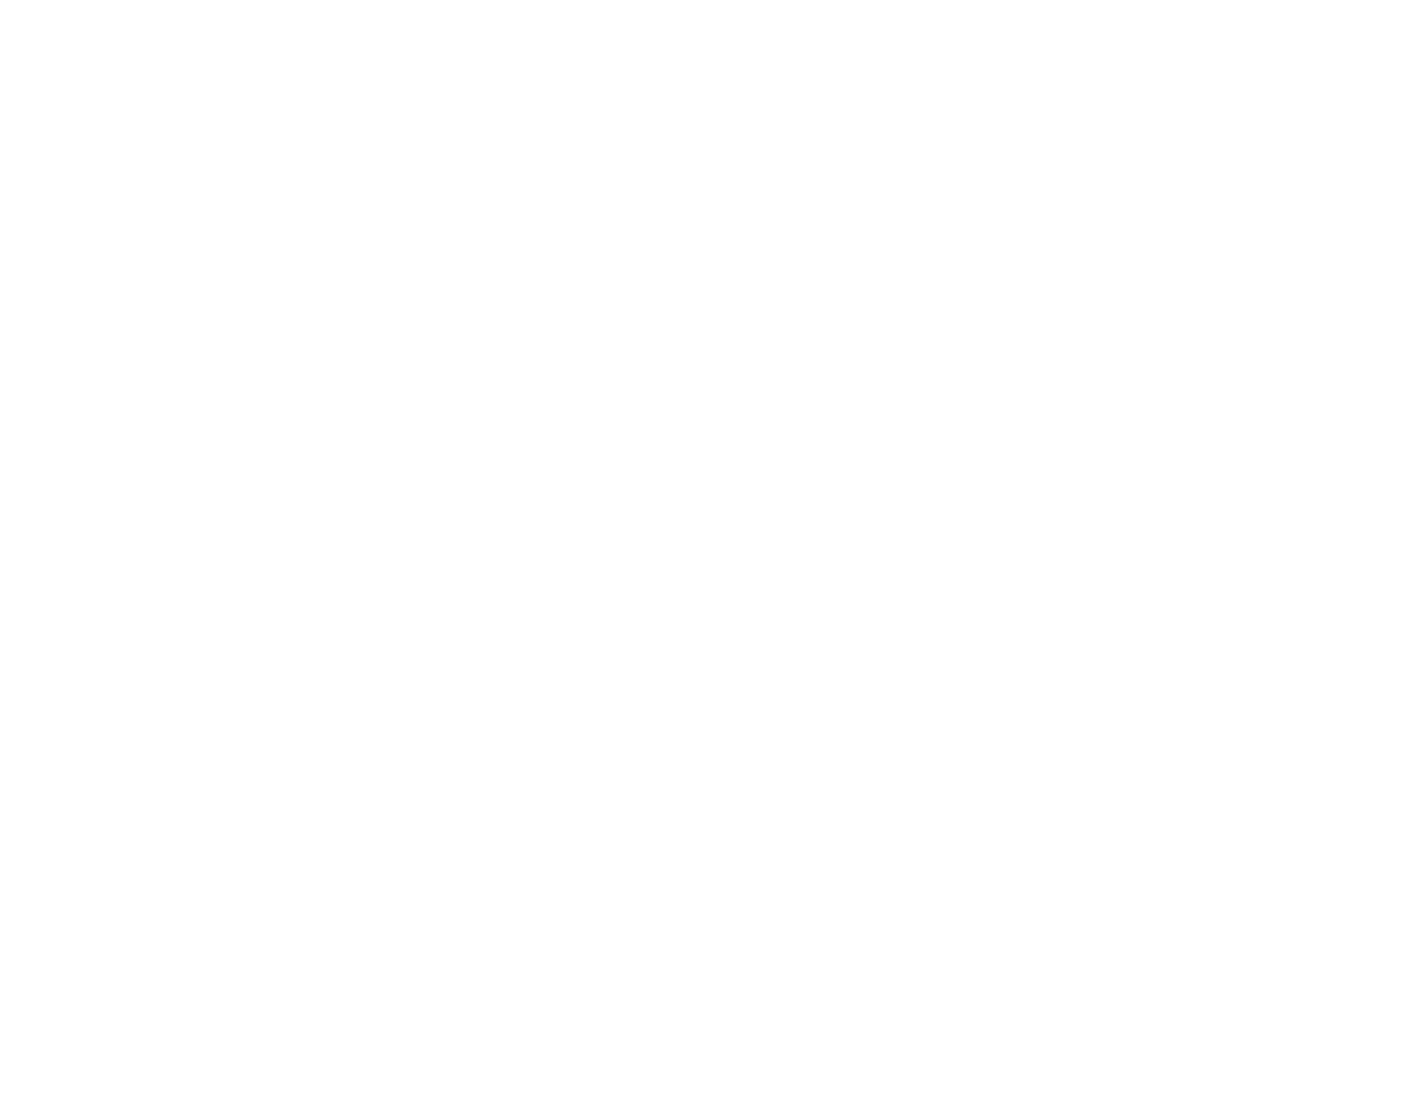

In [331]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=test_data[['age', 'sibsp', 'parch', 'sex_female', 'pclass_1',
       'pclass_2', 'travel_alone', 'below_16']],  
                   class_names=[[1], [0]],
                   filled=True)

In [323]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


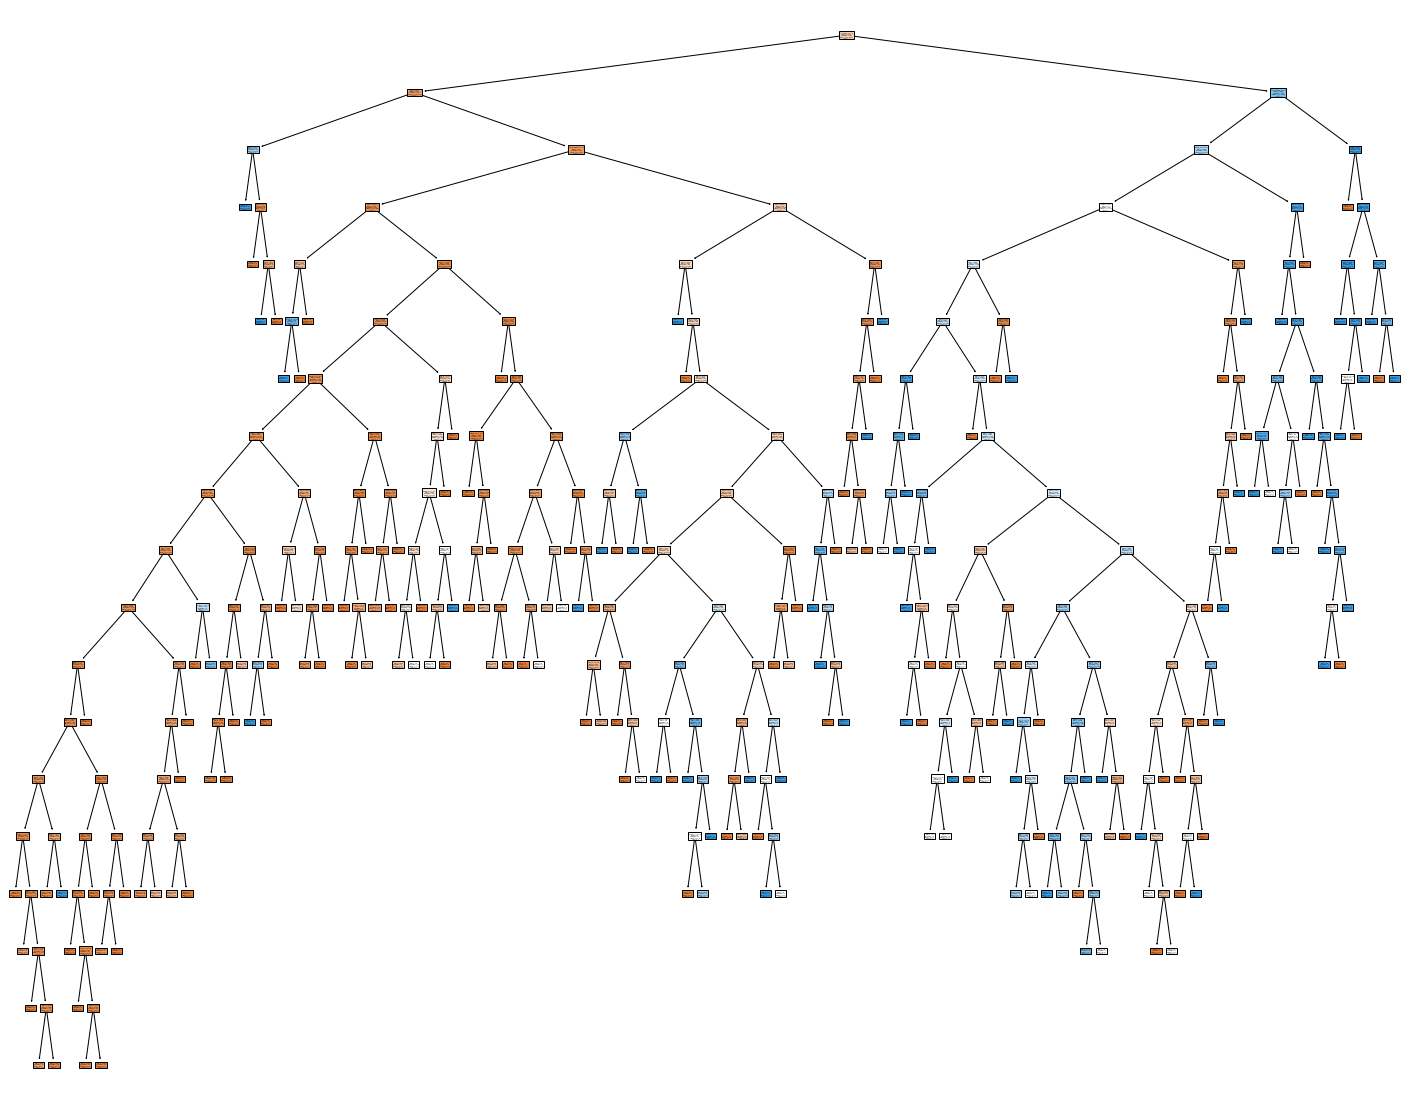

In [335]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=['age', 'sibsp', 'parch', 'sex_female', 'pclass_1',
       'pclass_2', 'travel_alone', 'below_16'],  
                   class_names=['1', '0'],
                   filled=True)

In [336]:
fig.savefig("decistion_tree2.png")

In [339]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [348]:
from graphviz import Source

In [356]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [357]:
graph = Source(tree.export_graphviz(dt, out_file=None, feature_names=['age', 'sibsp', 'parch', 'sex_female', 'pclass_1',
       'pclass_2', 'travel_alone', 'below_16'],
                                   class_names=['1', '0']))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [95]:
sd = pd.read_csv('C:/Users/under/Desktop/titanic_data/my_submission.csv')

In [96]:
sd

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [97]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [98]:
sd['original_surv'] = gender_submission.Survived

In [99]:
sd

,PassengerId,Survived,original_surv
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [100]:
sd.query('Survived == original_surv')

,PassengerId,Survived,original_surv
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [103]:
sdd = pd.read_csv('C:/Users/under/Desktop/titanic_data/my_submission2.csv')

In [104]:
sdd

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
